In [34]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb

In [35]:
(train_inputs, train_targets), (test_inputs, test_targets) = imdb.load_data(num_words=10000)

In [36]:
from numpy.lib import npyio
num_samples = 50000
dim_size = 10000

def encode_inputs(data, dim_size=dim_size):
  encoded_inputs = np.zeros((len(data), dim_size))

  for i, input in enumerate(data):
    for word_idx in input:
      encoded_inputs[i][word_idx] = 1

  return encoded_inputs

X_train = encode_inputs(train_inputs)
X_test = encode_inputs(test_inputs)
y_train = np.asarray(train_targets).astype("float32")
y_test = np.asarray(test_targets).astype("float32")

In [37]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [38]:
train_size = len(X_train)

idx_list = np.arange(train_size)
np.random.shuffle(idx_list)

X_val = X_train[idx_list[:10000]]
y_val = y_train[idx_list[:10000]]
X_train = X_train[idx_list[10000:]]
y_train = y_train[idx_list[10000:]]

In [39]:
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [40]:
epochs = 4
history = model.fit(X_train, y_train, 512, epochs, validation_data=[X_val, y_val])

Epoch 1/4
30/30 [==============================] - 3s 70ms/step - loss: 0.5567 - accuracy: 0.7891 - val_loss: 0.4375 - val_accuracy: 0.8577
Epoch 2/4
30/30 [==============================] - 1s 39ms/step - loss: 0.3634 - accuracy: 0.8885 - val_loss: 0.3396 - val_accuracy: 0.8784
Epoch 3/4
30/30 [==============================] - 1s 37ms/step - loss: 0.2732 - accuracy: 0.9141 - val_loss: 0.2983 - val_accuracy: 0.8860
Epoch 4/4
30/30 [==============================] - 1s 44ms/step - loss: 0.2204 - accuracy: 0.9294 - val_loss: 0.2814 - val_accuracy: 0.8878


<ipython-input-41-b1845c5ebe1f>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, loss_values, "bo", label="Training Loss", c="orange")


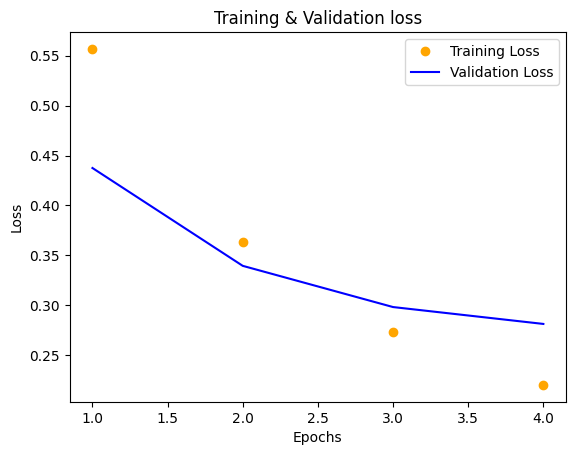

In [41]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict['val_loss']
epochs = np.arange(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training Loss", c="orange")
plt.plot(epochs, val_loss_values, "b", label="Validation Loss")
plt.title("Training & Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

<ipython-input-42-eabd612ace4a>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, acc_values, "bo", label="Training acc", c="orange")


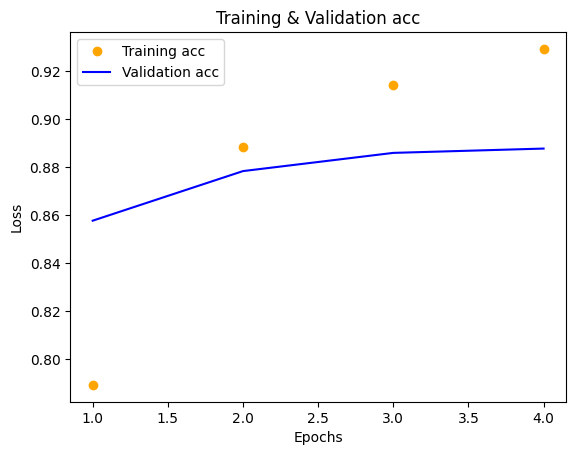

In [42]:
history_dict = history.history
acc_values = history_dict["accuracy"]
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, "bo", label="Training acc", c="orange")
plt.plot(epochs, val_acc_values, "b", label="Validation acc")
plt.title("Training & Validation acc")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [43]:
results = model.evaluate(X_test, y_test)
print(results)

782/782 [==============================] - 2s 2ms/step - loss: 0.2911 - accuracy: 0.8860
[0.29109421372413635, 0.8859599828720093]


In [45]:
model.predict(X_test)

782/782 [==============================] - 2s 2ms/step


array([[0.2980524 ],
       [0.9975908 ],
       [0.60928965],
       ...,
       [0.11261839],
       [0.12130122],
       [0.41638157]], dtype=float32)